# Problem Set #2
Preston Mui

## Calorie Demand

In [92]:
# Preparation to use the dataset
using DataFrames, Gadfly
data = readtable("RPS_calorie_data.out");

### 2
**Using the power series basis, construct a new basis that is orthogonal to the design points ($K = 12$)**

In [124]:
# Extract the matrices from the data
K = 2
Y = convert(Array,data[:Y0tc])
X = zeros(size(data)[1],K)

# Construct the basis vectors
for k = 1:K
    X[:,k] = data[:X0te].^(k-1)
end

# Gram-Schmidt Orthogonalization
W = zeros(size(X))
for k = 1:K
    W[:,k] = X[:,k]
    for i = 1:k-1
        W[:,k] = W[:,k] - (dot(X[:,k],W[:,i]) / dot(W[:,i],W[:,i])) * W[i]
    end
end
# Orthonormalization
for k = 1:K
    W[:,k] = W[:,k] / norm(W[:,k])
end

**Let $W_i$ denote the $K \times 1$ vector of orthonormal basis functions for household $i$. Compute the Least Squares Fit:**

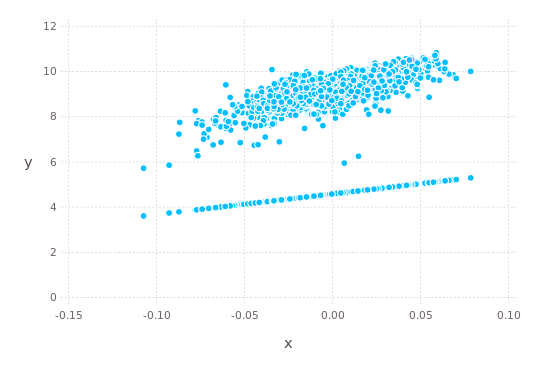

In [129]:
theta = (1 / sum(diag(W*W'))) * W' * Y
m = W * theta
    plot(layer(x=W[:,2], y=m, Geom.point),
    layer(x=W[:,2], y=Y, Geom.point))